# Notation cheat sheet

## Estimators of $\pi$ (`pi_target`)

* $\pi_{nrm}$ - the norm-based ratio estimator:
$$\pi_{nrm} = \sqrt{\frac{\Delta_{P', P_{-}}}{\Delta_{P_{+}, P_{-}}}}$$
- $\pi_{ipr}$ - the inner-product based projection estimator:
$$\pi_{ipr} = \frac{\langle\Phi(P') - \Phi(P_{-}), \Phi(P_{+}) - \Phi(P_{-})\rangle}{||\Phi(P_{+}) - \Phi(P_{-})||^2}$$
- $\hat \pi_{nrm}$ - the norm-based ratio estimator; $\hat \pi_{ipr}$ - the inner-product based projection estimator; $\hat \pi$ - any of the above estimators
- two versions: U and V for both $\hat \pi_{nrm}$ and $\hat \pi_{ipr}$

## Main asymptotics
- $r_n = 1/n' + 1/n^{+}+ 1/n^{-}$
- $\frac{1/n'}{r_n} \to \lambda'$, $\frac{1/n^{+}}{r_n} \to \lambda_{+}$, $\frac{1/n^{-}}{r_n} \to \lambda_{-}$

$$\frac{\hat \pi - \pi}{\sqrt{r_n}} \to \mathcal{N}\Big(0, \frac{\lambda'\tau' + \lambda^{+}\tau^{+}+ \lambda^{-}\tau^{-}}{\Delta_{P^{+},P^{-}}^2}\Big)$$

$$\gamma := \frac{\lambda'\tau' + \lambda^{+}\tau^{+}+ \lambda^{-}\tau^{-}}{\Delta_{P^{+},P^{-}}^2}$$

## Asymtotic variance estimation

### Plug-in

We use formulas:
- $\tau' = \textrm{Var}(\Phi_{-}^{+}(X'))$
- $\tau_{+} = \textrm{Var}(\Phi_{-}^{'}(X_{+}))$
- $\tau_{-} = \textrm{Var}(\Phi_{+}^{'}(X_{-}))$

Empirical versions of all the $\tau$
- $\hat \tau' = \textrm{Var}(\hat\Phi_{-}^{+}(X'))$
- $\hat \tau_{+} = \textrm{Var}(\hat\Phi_{-}^{'}(X_{+}))$
- $\hat \tau_{-} = \textrm{Var}(\hat\Phi_{+}^{'}(X_{-}))$

and
$$\hat \gamma_{plug-in} := \frac{\lambda'\hat\tau' + \lambda^{+}\hat\tau^{+}+ \lambda^{-}\hat\tau^{-}}{\hat\Delta_{P^{+},P^{-}}^2}$$


### Explicit

_outline_

We further compute
$$\tau' = \textrm{Var}(\Phi_{-}^{+}(X')) = \textrm{Var}(\Phi_{P+}(X_{+})) + ...,$$
then $$\textrm{Var}(\Phi_{P+}(X_{+})) = \mathbb{E}\Phi_{P+}(X_{+})^2 - (\mathbb{E}\Phi_{P+}(X_{+}))^2,$$
then $$\mathbb{E}\Phi_{P+}(X_{+})^2 = \mathbb{E}K(X_1^{+},X_2^{+})K(X_1^{+},X_3^{+}),$$ and then estimate all the terms like $\mathbb{E}K(X_1^{+},X_2^{+})K(X_1^{+},X_3^{+})$ using U-type estimators.


## Gaussian case

- $\tau' = \textrm{Var}(\Phi_{-}^{+}(X')) = \pi'\textrm{Var}(\Phi_{-}^{+}(X_{+})) + (1-\pi')\textrm{Var}(\Phi_{-}^{+}(X_{-})) + \pi'(1-\pi')\Delta_{P_+,P_-}^2$
- $\tau_{+} = (\pi')^2 \textrm{Var}(\Phi_{-}^{+}(X_{+}))$
- $\tau_{-} = (1 - \pi)^2\textrm{Var}(\Phi_{-}^{+}(X_{-}))$

$$\gamma = \Big(\pi'(\lambda' + \lambda_+\pi')\Big)\textrm{Var}(\Phi_{-}^{+}(X_{+})) + \Big(...\Big)$$


# Selecting estimators: IPR/NRM x U/V

Conclusion: for further simulations we've chosen IPR-U and NRM-U (so both estimator in an U version) based on a plot below.

More results: `01_simulation_estimators_pi_u_v.ipunb`.

Sim. settings:
 - $P_{+} \sim N_p(0, I)$
 - $P_{-} \sim N_p(\beta*(1,\ldots,1), I)$
 - $p=5$
 - $n_{+}=n_{-}=n'$

 In rows: changing $\pi$ (pi_target), in columns: $\beta$, on x-axis $n_{+}=n_{-}=n'$, on y-axis estimators $\hat \pi_{nrm}$ and $\hat \pi_{ipr}$ (U/V)


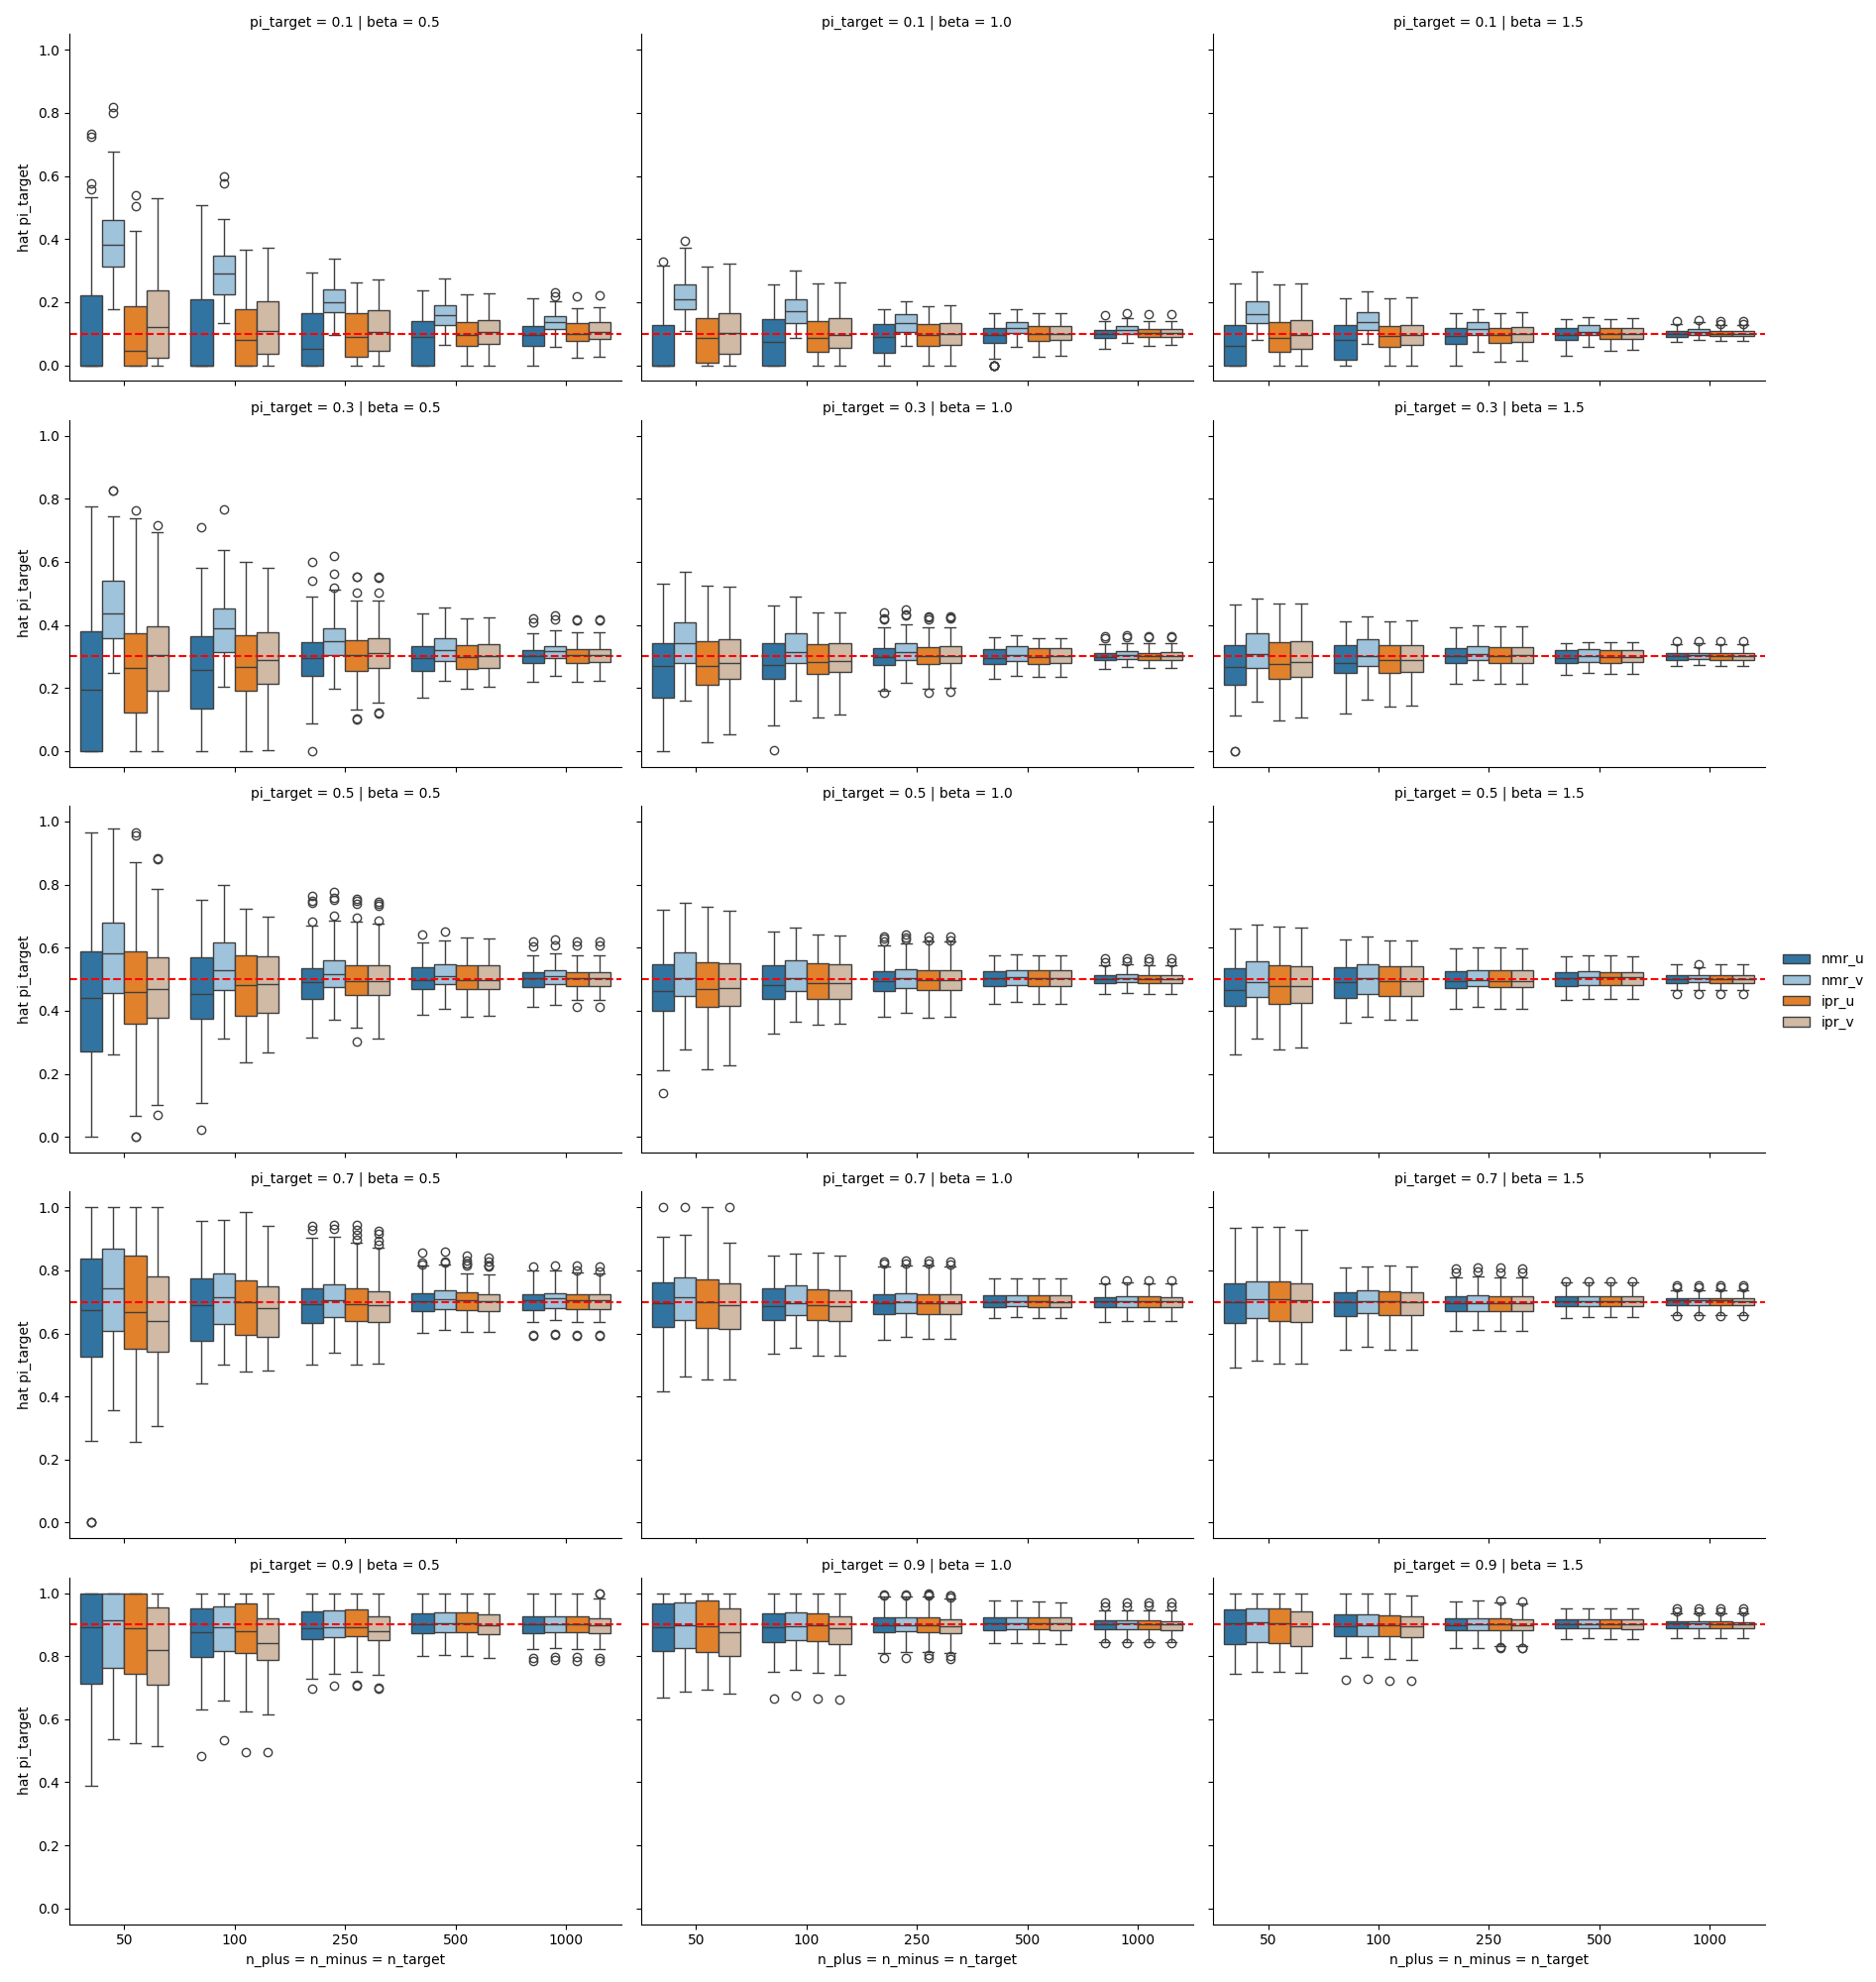

In [2]:
from IPython.display import Image, display
display(Image("results/01_simulation_estimators_UV_v1.png"))

# Asymtotic variance: estimators vs true as. var for Gaussian case

Conclusion: for further simulations we've chosen "plug-in estimator" of the asymptotic variance

More results: `02_simulation_variance.ipynb`.

Sim. settings:
 - $P_{+} \sim N_p(0, I)$
 - $P_{-} \sim N_p(\beta*(1,\ldots,1), I)$
 - $p=5$, $\beta=1$
 - $n_{+}=n_{-}=500$

 Rows: pi_target, x-axis: n_target; y-axis: $\tau$ (left column) and $\gamma$ (right column) estimators

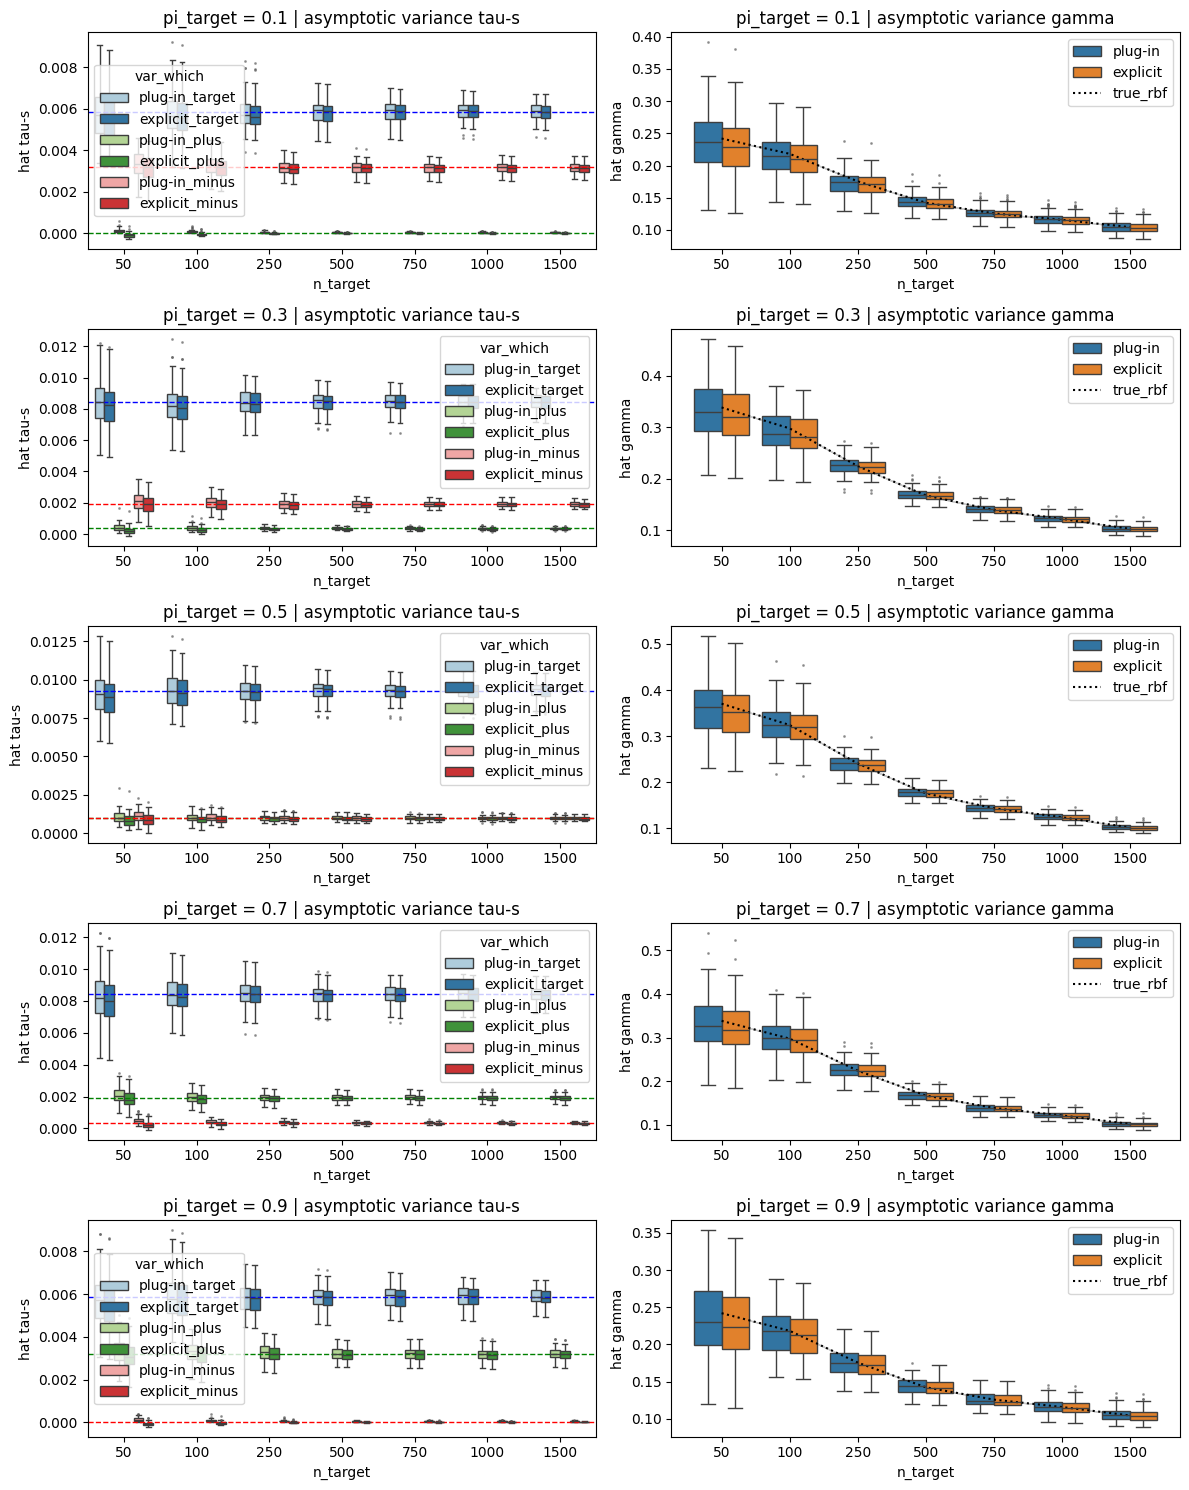

In [4]:
display(Image("results/02_simulations_var_n_target.png"))

# Selecting a param of the RBF kernel: gamma/sigma

$$K(x,y) = \exp(-\gamma||x-y||^2)=\exp(-||x-y||^2/(2\sigma^2))$$

Conclusion: We need to further investigate how to find optimal $\gamma_{rbf}$. It can be done either on a grid based on plug-in/explicit estimators; or on a grid based on a formula for the asymtotic variance for Gaussian distributions (it needs pi_target, mu+, mu-, Sigma+, Sigma- estimators); or by numerically finding a minimum of a formula for the asymtotic variance for Gaussian distributions (it still needs pi_target, mu+, mu-, Sigma+, Sigma- estimators and there is a question how to estimate pi_target (gamma?))

Figure below:

- Sim. settings
    - $P_{+} \sim N_p(0, I)$
    - $P_{-} \sim N_p(\beta*(1,\ldots,1), I)$
    - $p=5$, $\beta=1$
    - $n_{+}=n_{-}=n'=500$

 - Top panel shows minima of a formula for the asymtotic variance for Gaussian distributions using pi_target, mu+, mu-, Sigma+, Sigma- estimators
 - Middle panel shows corresponding values of the asymptotic variance for Gaussian distributions using pi_target, mu+, mu-, Sigma+, Sigma- estimators
 - Bottom panel: plug-in/explicit estimators

More similar results: `03_simulations_gamma.ipynb`

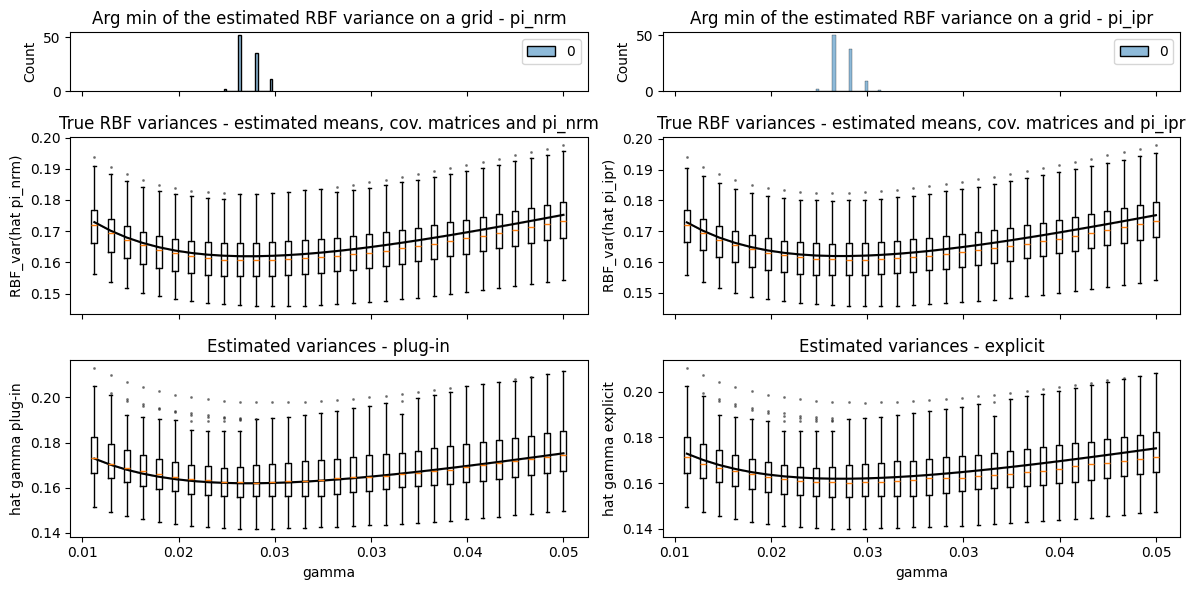

In [5]:
display(Image("results/03_simulations_n500_pi_target_03.png"))

Figure below shows how $\hat \pi$'s change with changing $\gamma_{rbf}$ - U estimators seem quite stable. Here the rule of thumb value for $\gamma_{rbf}$ is $0.2$ (one over the number of features).

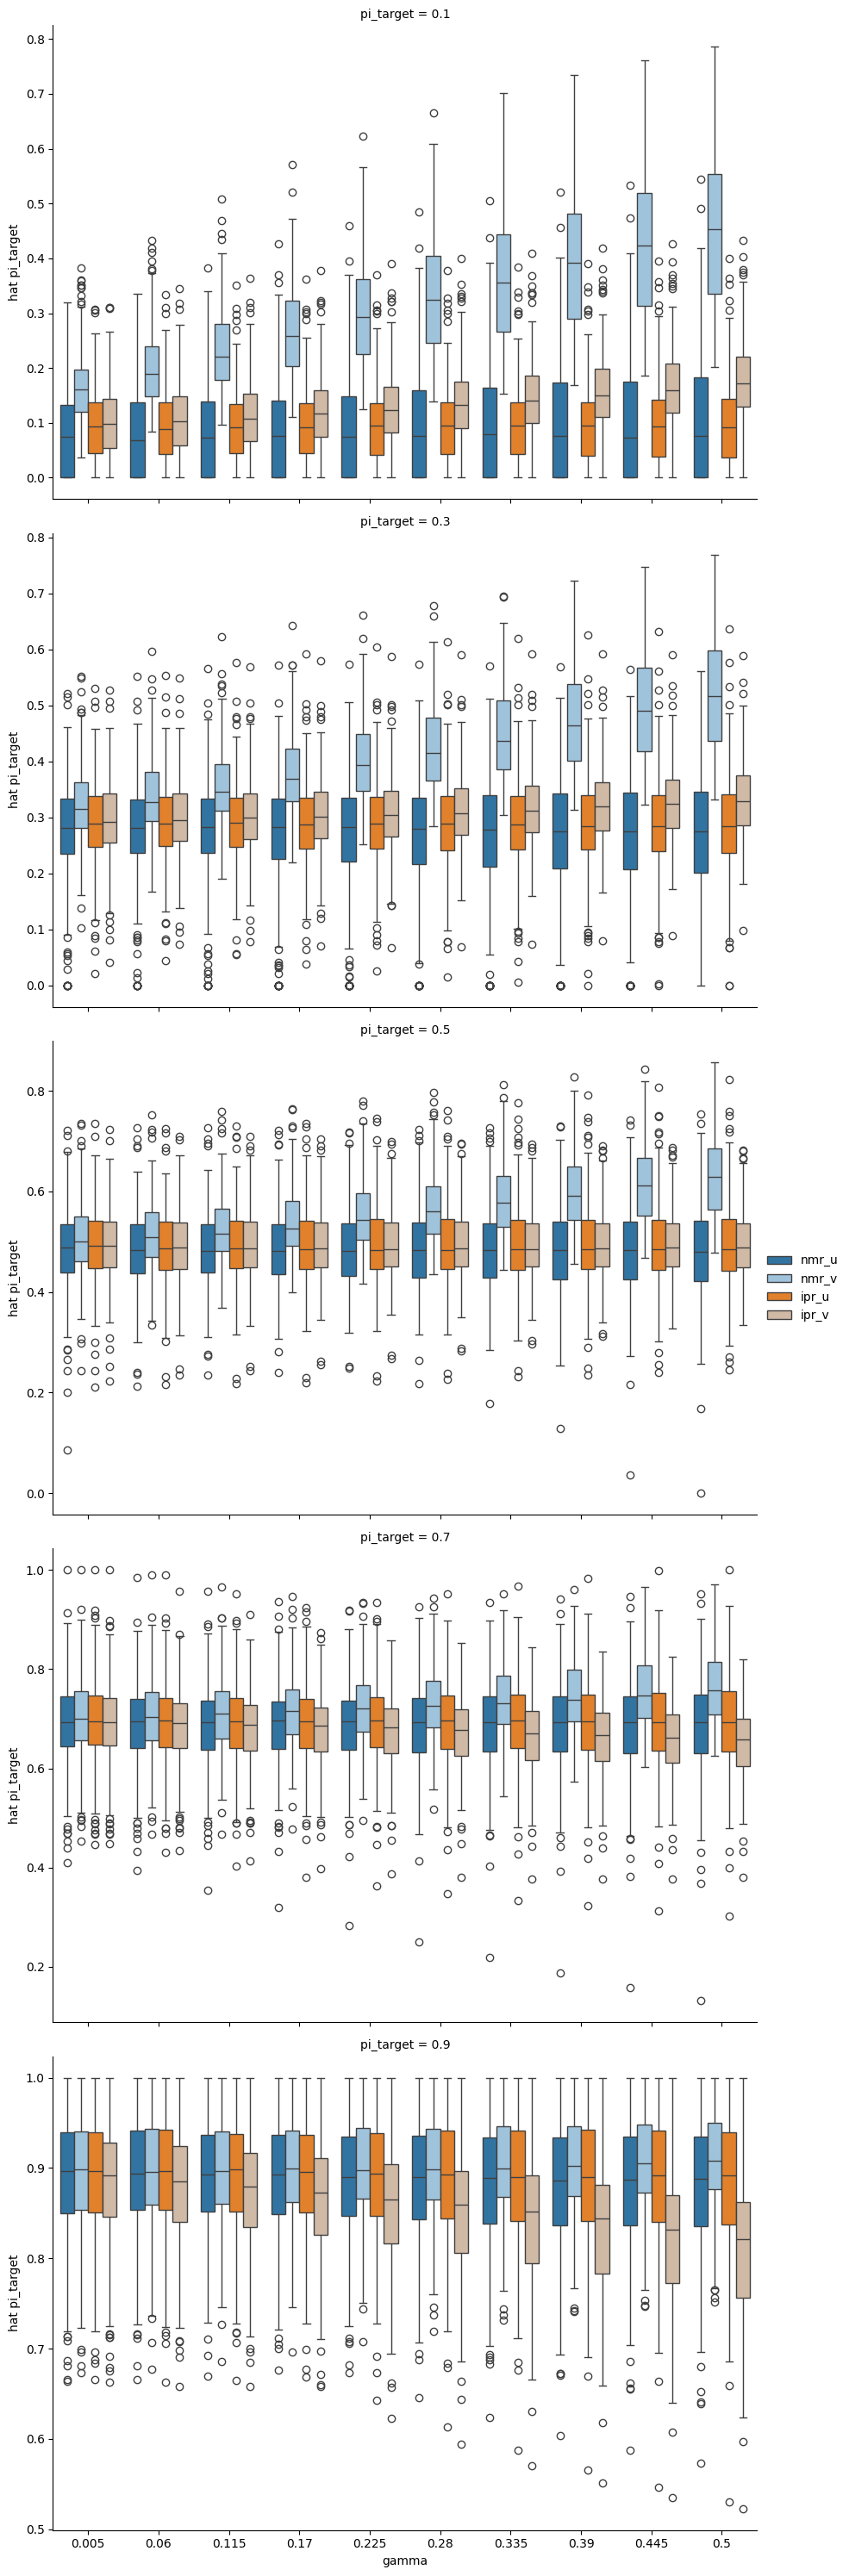

In [8]:
display(Image("results/01_simulation_gamma.png", width=600))

# Confidence intervals

Here is a proposal on how to visualise and compare CI for various estimators.

The first plot shows 100 CI for a fixed simulation params (the only param that's changing is pi_target). Red are the ones that do not cover the true value. In the second plot for each value on x-axis we sum the number of CI that the given point belongs to: we want to see value ~0.95 where the vertical line is, and steep slopes (as then the CIs are narrrow).

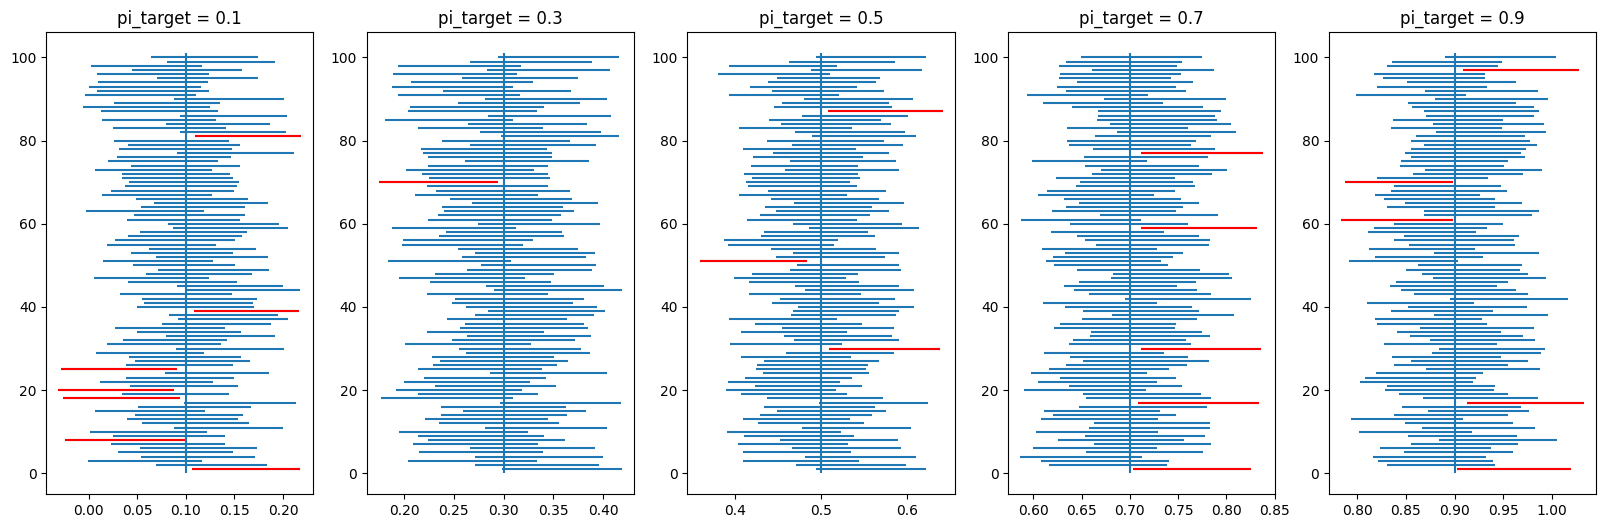

In [9]:
display(Image("results/04_simulations_ci.png"))

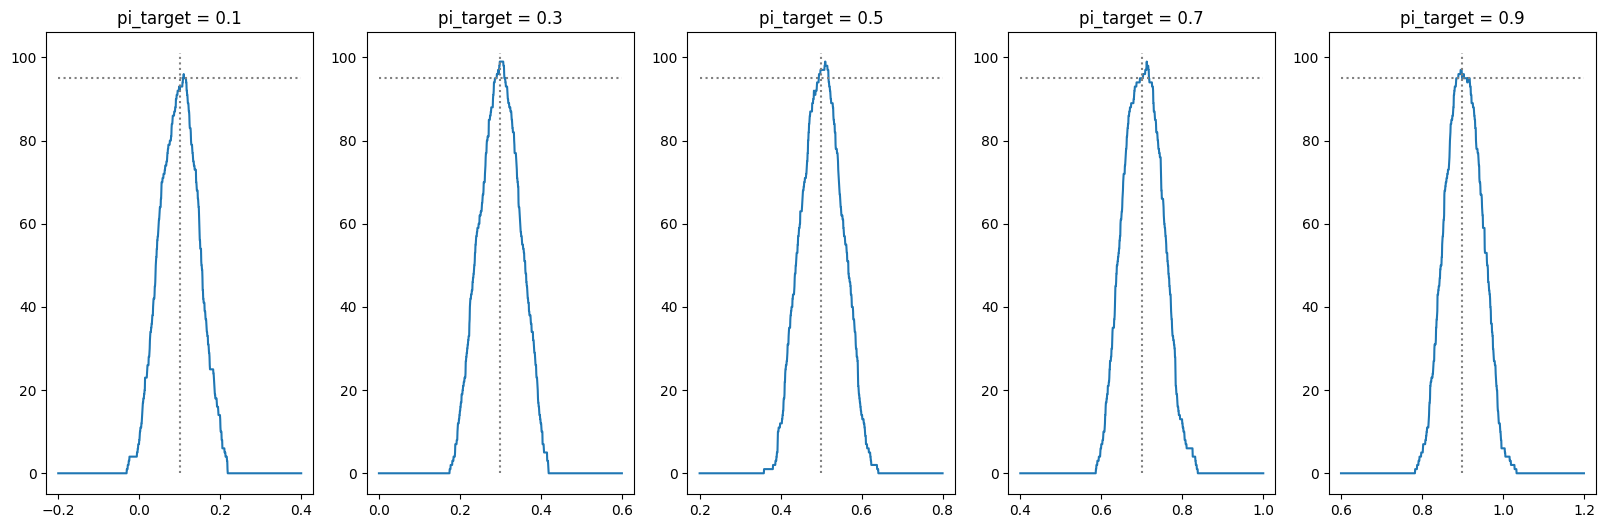

In [10]:
display(Image("results/04_simulations_ci_summary.png"))